In [1]:
import sys
sys.path.append('../')
from nba_season import NBA_Season
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = []
for i in range(1990, 2020):
    seas = NBA_Season(i)
    season_games = seas.playoffs
    season_games = season_games[season_games['WL'] == 'W'].copy()
    season_games['qual'] = season_games['MATCHUP'].str.split(' ').str[1]
    season_games['h/v won'] = season_games.apply(lambda row: 'H' if row['qual'] == 'vs.' else 'V', axis = 1)
    row = [i, season_games['h/v won'].value_counts()['H'], season_games['h/v won'].value_counts()['V']]
    data.append(row)

df = pd.DataFrame(data=data, columns=['year', 'h_wins', 'v_wins'])

df['h_win_pct'] = round(df['h_wins'] / (df['h_wins'] + df['v_wins']), 4) * 100


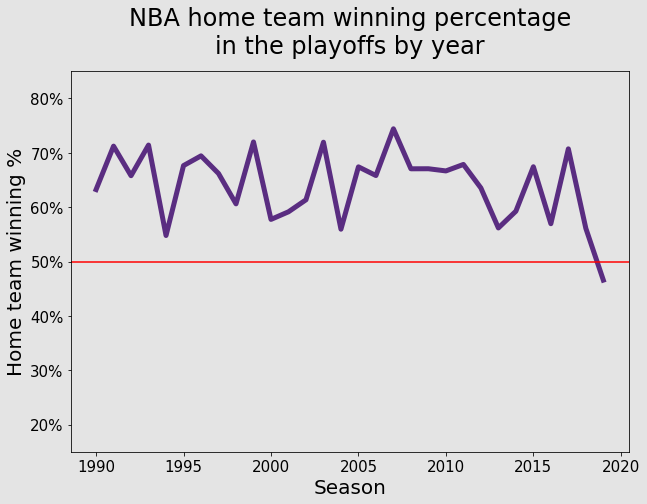

In [3]:
fig, ax = plt.subplots(facecolor='#E4E4E4')
fig.patch.set_facecolor('#E4E4E4')
ax.patch.set_facecolor('#E4E4E4')
plt.plot(df['year'], df['h_win_pct'], color='#5A2D81', linewidth=5)
ax.axhline(y=50, color="red")
plt.xlabel("Season", fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Home team winning %', fontsize=20)
plt.ylim(top=85, bottom=15)
plt.yticks(range(20,81,10),  [str(i) + '%' for i in range(20,81,10)], fontsize=15)
plt.title('NBA home team winning percentage\nin the playoffs by year', pad=18, fontsize=24)
fig.set_size_inches(10, 7, forward=True)
fig.patch.set_facecolor('#E4E4E4')
